# Week 5  Advanced Data Manipulation with Pandas

In [47]:
## importing required libraries for our analysis


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading Sales dataset and Customer Churn dataset through Pandas library to different variables 

df_sales = pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\DevelopersIntern\sales_data.csv")
df_customer = pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\DevelopersIntern\customer_churn.csv")

In [3]:
## displaying Sales dataset

df_sales

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [56]:
## displaying the number of rows and columns present in the dataset

df_sales.shape

(100, 10)

In [5]:
## checking null values in the Sales dataset

df_sales.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [59]:
### displaying data types of the features

df_sales.dtypes

Date           datetime64[ns]
Product                object
Quantity                int64
Price                   int64
Customer_ID            object
Region                 object
Total_Sales             int64
Month                   int32
day                     int32
Month_Name             object
dtype: object

In [7]:
### converting datatype of 'Date' column to 'DateTime' and extracting 'Month_Name' from 'Date' column 

df_sales['Date'] = pd.to_datetime(df_sales['Date'])

df_sales["Month_Name"] = df_sales["Date"].dt.month_name()
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

monthly_sales = df_sales.groupby('Month_Name', sort='False')['Total_Sales'].sum()

monthly_sales = monthly_sales.reindex(month_order)
df_sales

In [9]:
df_sales

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Month,day
0,2024-01-01,Phone,7,37300,CUST001,East,261100,1,1
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,1,2
2,2024-01-03,Phone,2,21746,CUST003,West,43492,1,3
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,1,4
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,1,5
...,...,...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160,4,5
96,2024-04-06,Headphones,1,7647,CUST097,West,7647,4,6
97,2024-04-07,Tablet,5,27196,CUST098,East,135980,4,7
98,2024-04-08,Monitor,1,30717,CUST099,North,30717,4,8


In [10]:
## displaying Total sales made by each product type

product_sales = (df_sales.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False))
product_sales

Product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: Total_Sales, dtype: int64

#### Laptop product is sold highly while Monitors are sold low

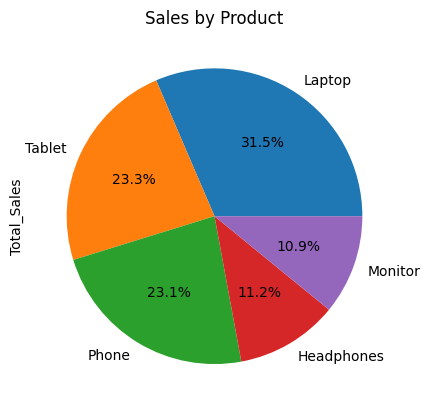

In [11]:
## displaying the percentage of sales made by each product type/ proportion of sales done by each category

product_sales.plot(kind= "pie", autopct= '%1.1f%%', title = 'Sales by Product')
plt.ylabel = "Total_Sales"
plt.xlabel = "Product"
plt.show()

In [12]:
## displaying regional sales  

Region_Sales = (df_sales.groupby("Region")["Total_Sales"].sum().sort_values(ascending = False))
Region_Sales

Region
North    3983635
South    3737852
East     2519639
West     2123922
Name: Total_Sales, dtype: int64

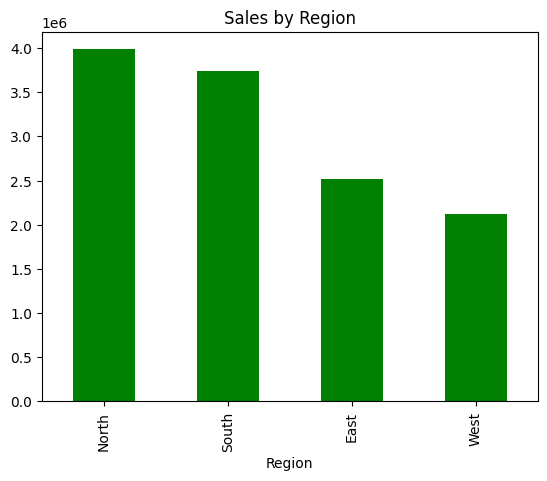

In [13]:
## bar chart displaying region-wise sales

Region_Sales.plot(kind = 'bar', title = 'Sales by Region', color= 'Green')
plt.xlabel = 'Region'
plt.ylabel = 'Total_Sales'
plt.show()

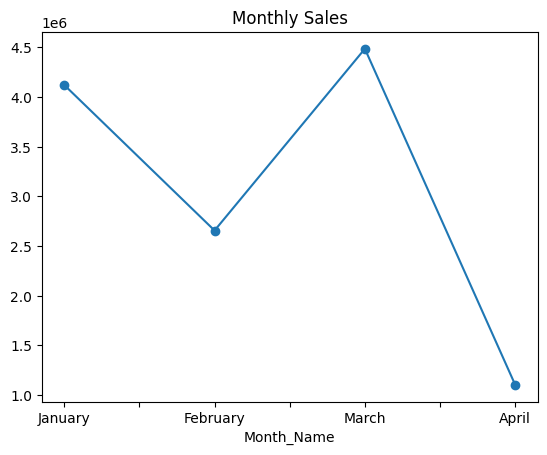

In [24]:
## Line plot monthly sales trends

monthly_sales.plot(kind='line', marker = "o", title = 'Monthly Sales') 
plt.xlabel ='Month_Name' 
plt.ylabel= 'Total_Sales'
plt.show()

In [61]:
## displaying pivot table visualization

pivot_table = pd.pivot_table(df_sales, values= 'Total_Sales', index = 'Region', columns = 'Product', aggfunc= 'sum')

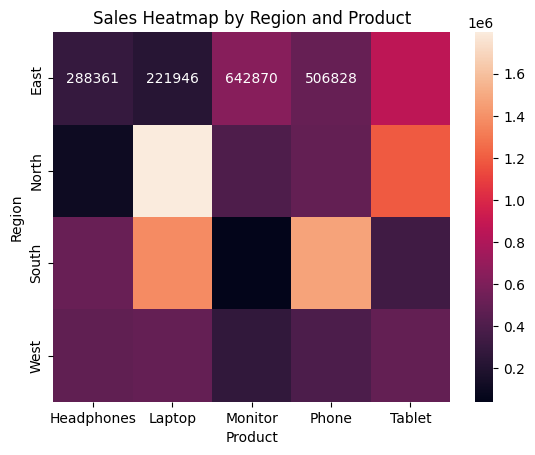

In [63]:
sns.heatmap(pivot_table, annot=True, fmt=".0f")
plt.title("Sales Heatmap by Region and Product")
plt.show()

### Analysing Customer Churn Dataset

In [25]:
df_customer

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1


In [27]:
## checking datatypes of all columns

df_customer.dtypes

CustomerID          object
Tenure               int64
MonthlyCharges       int64
TotalCharges         int64
Contract            object
PaymentMethod       object
PaperlessBilling    object
SeniorCitizen        int64
Churn                int64
dtype: object

In [35]:
## dropping columns which are not required for our analysis

df_customer = df_customer.drop(columns = ['CustomerID', 'PaperlessBilling'], axis=1)
df_customer

In [36]:
## checking for null values 

df_customer.isnull().sum()

Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
PaymentMethod     0
Churn             0
dtype: int64

In [38]:
## displaying proportion of Churned and Retained customers 

churn_rate = df_customer["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
0    89.4
1    10.6
Name: proportion, dtype: float64

#### About 10.6% of customers churned

In [39]:
## displaying 'Tenure' vs 'Churn' by using groupby

df_customer.groupby('Churn')['Tenure'].mean()

Churn
0    40.152125
1     6.000000
Name: Tenure, dtype: float64

#### Churned customers have much lower tenure. 

In [43]:
## displaying 'PaymentMethod' vs 'Churn' 

Payment_churn = pd.crosstab(df_customer['PaymentMethod'], df_customer['Churn'], normalize= 'index')*100
Payment_churn

Churn,0,1
PaymentMethod,,
Bank Transfer,93.081761,6.918239
Credit Card,86.516854,13.483146
Electronic Check,88.957055,11.042945


#### Credit Card users are showing high churn rate compared to other payment methods. To improve retention rate, should offer discounts paying through Credit cards. 

In [46]:
## displaying 'Contract' vs 'Churn'

Contract_churn = pd.crosstab(df_customer['Contract'], df_customer['Churn'], normalize = 'index')*100
Contract_churn

Churn,0,1
Contract,,
Month-to-month,79.411765,20.588235
One year,95.698925,4.301075
Two year,93.055556,6.944444


#### Month-to-Month contract customers are churn more. So provide personalized discounts to high paying customers.

Text(0.5, 1.0, 'Tenure vs Churn')

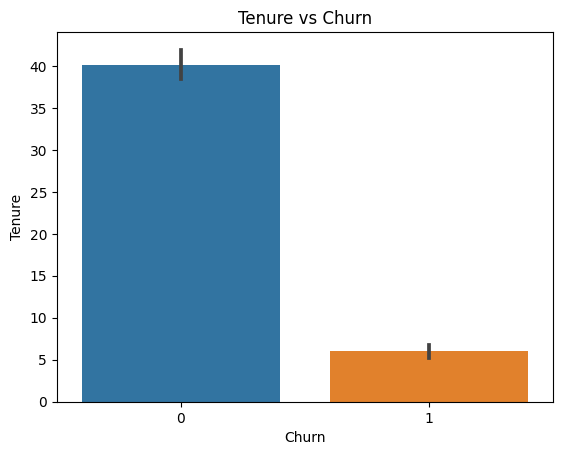

In [53]:
## barplot displaying 'Tenure' vs 'Churn'

sns.barplot(data= df_customer, x = 'Churn', y= 'Tenure')
plt.title('Tenure vs Churn')

Text(0.5, 1.0, 'PaymentMethod vs Churn')

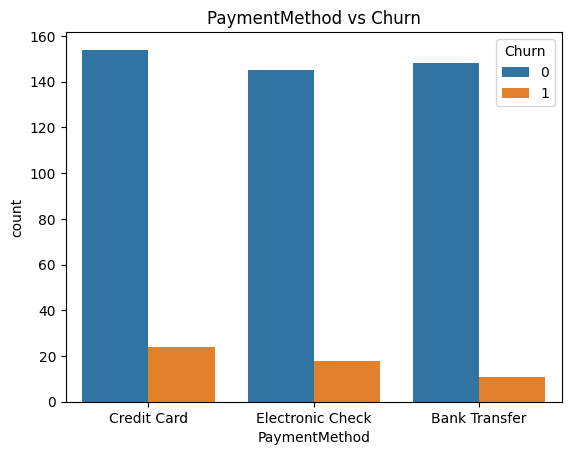

In [54]:
## count plot displaying 'PaymentMethod' vs 'Churn' 

sns.countplot(data=df_customer, x='PaymentMethod', hue ='Churn')
plt.title('PaymentMethod vs Churn')